In [ ]:
import cv2
from sklearn.cluster import DBSCAN
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread("/content/Screenshot_20230701_163551_WhatsApp.png")
#template = cv2.imread("/content/Projectbg (20230701060533).jpg", 0)
template = cv2.imread("/content/Projectgg (20230701071026).jpg", 0)

Number of chats:  9


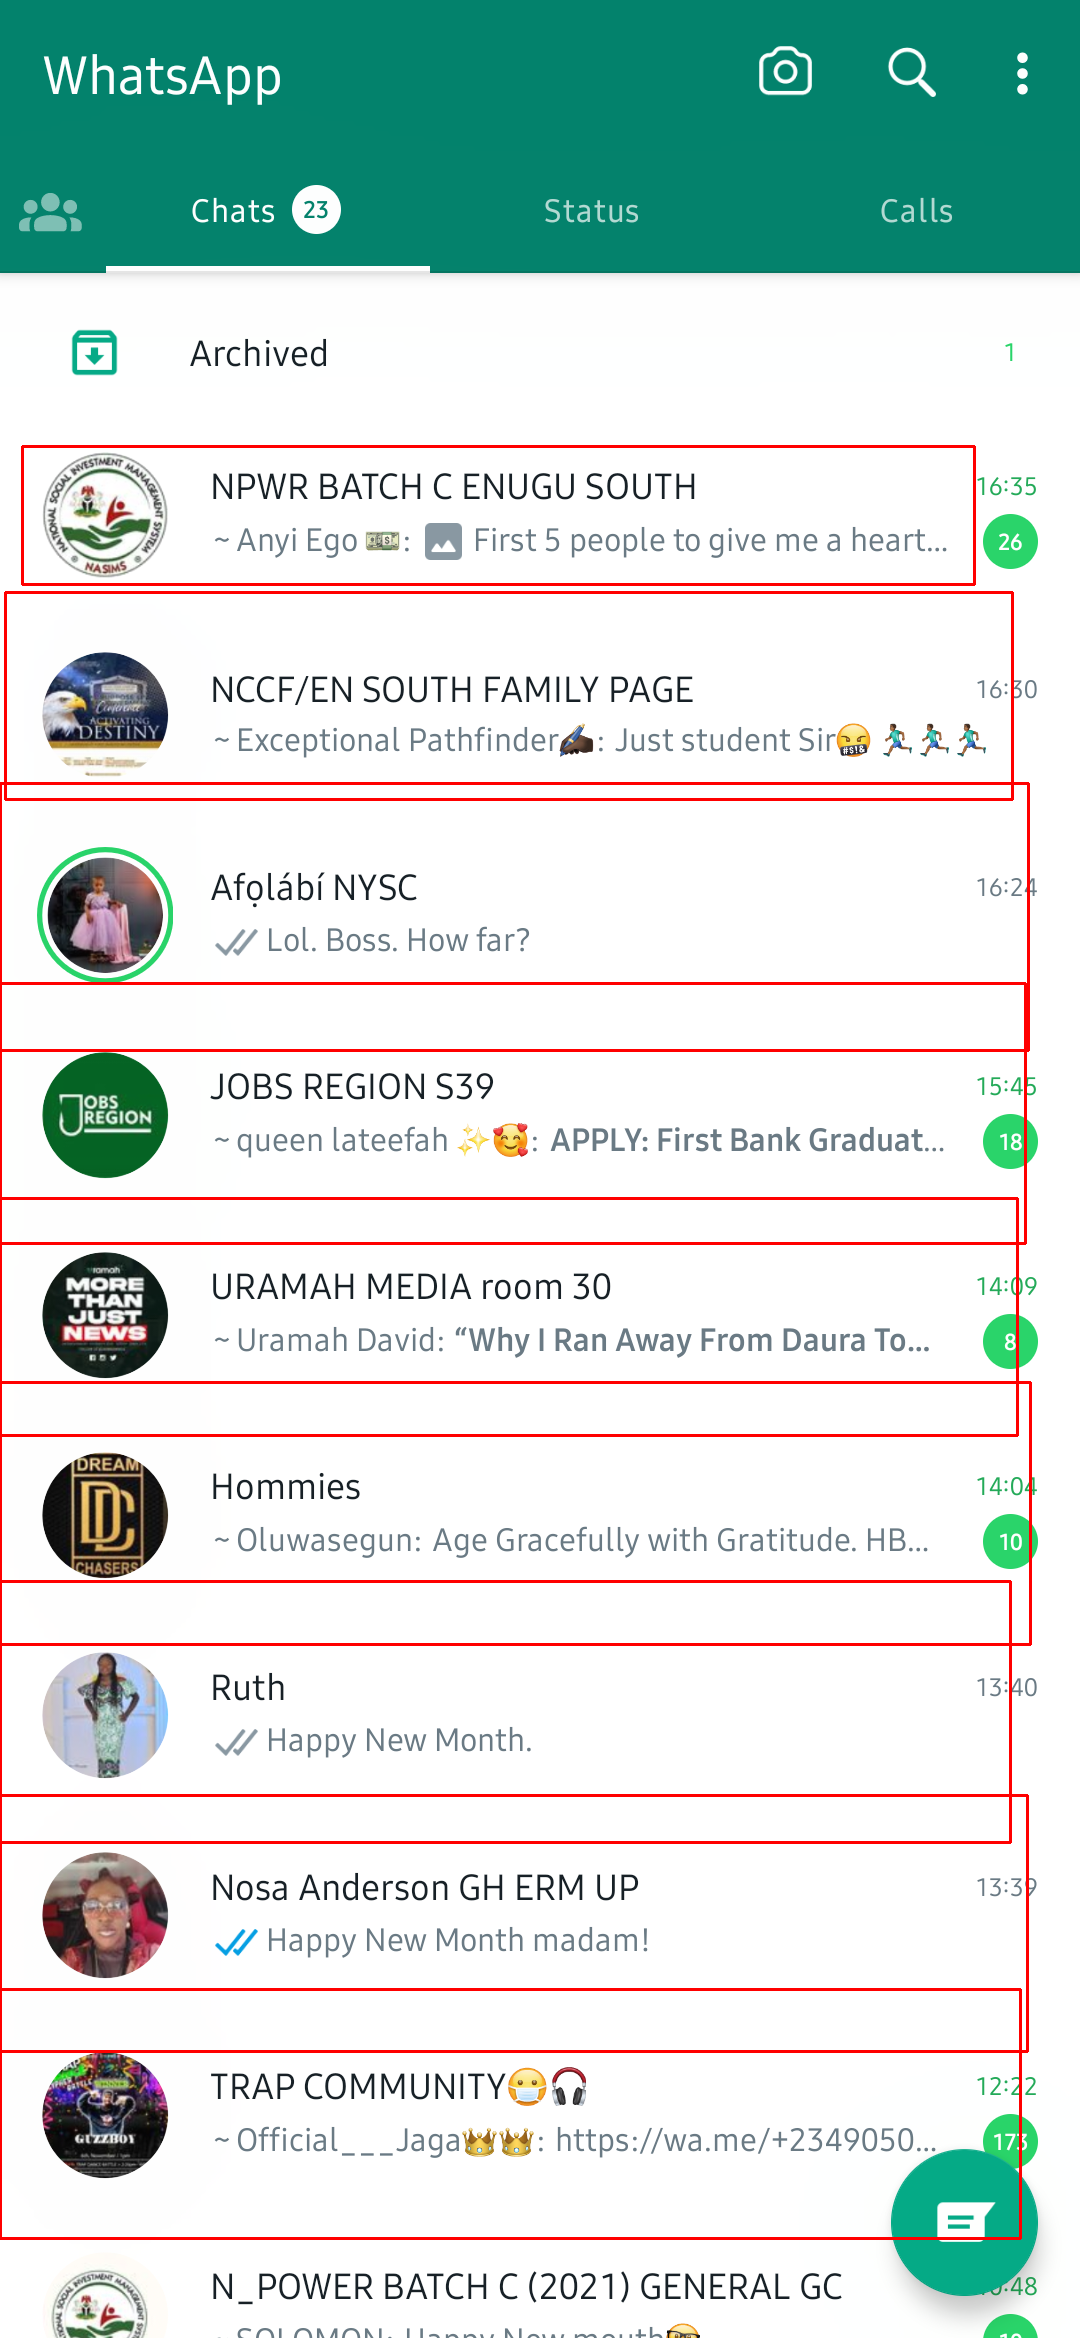

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
# Perform template matching
result = cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF_NORMED)

# Set a threshold value
threshold = 0.3

# Find the locations where the match score is above the threshold
loc = np.where(result >= threshold)
imagec = image.copy()

# Create a list of rectangles
rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([pt[0], pt[1], pt[0] + w, pt[1] + h])

# Transform rectangles to center points for DBSCAN
points = [[(rect[0]+rect[2])//2, (rect[1]+rect[3])//2] for rect in rectangles]

# Use DBSCAN to cluster the center points
clustering = DBSCAN(eps=50, min_samples=1).fit(points)

# Group the rectangles by cluster
clusters = {}
for rect, label in zip(rectangles, clustering.labels_):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(rect)

# Draw a rectangle around each cluster
for rects in clusters.values():
    min_x = min(rect[0] for rect in rects)
    min_y = min(rect[1] for rect in rects)
    max_x = max(rect[2] for rect in rects)
    max_y = max(rect[3] for rect in rects)
    cv2.rectangle(imagec, (min_x, min_y), (max_x, max_y), (0,0,255), 2)


# Display the image
print("Number of chats: ", len(clusters.values()))
cv2_imshow(imagec)